In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from ethicml.algorithms.inprocess import LR, SVM, Majority, ZafarAccuracy, ZafarFairness, Kamiran, Agarwal
from ethicml.metrics import Accuracy, AbsCV, ProbPos, TPR, TNR, F1, BalancedAccuracy
from ethicml.preprocessing import BalancedTestSplit
from ethicml.evaluators import evaluate_models_async, load_results
from ethicml.data import Adult, load_data
from ethicml.visualisation import plot_results, single_plot
from ethicml.utility import Results

In [3]:
rate_y1_s0_sex = 0.11451785988042312
rate_y1_s1_sex = 0.31711446448288555
rate_avg_sex = 0.21581616218

rate_y1_s0_race = 0.1561938958707361
rate_y1_s1_race = 0.26669745425157304
rate_avg_race = 0.21144567506

In [4]:
df_race = Results.from_file(Path("results") / "dp_balanced_test_10repeats_Adult Race-Binary_no_transform.csv")
df_sex = Results.from_file(Path("results") / "dp_balanced_test_10repeats_Adult Sex_no_transform.csv")

In [7]:
models = [
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_avg_race}",
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_avg_sex}",
    "Kamiran & Calders LR",
    "ZafarAccuracy, γ=0.5",
    "ZafarFairness, c=0.001",
    "Agarwal, LR, DP",
    "SVM",
    "Logistic Regression, C=1.0",
]
df_race.filter(models).aggregate(["Accuracy", "prob_pos_race_White_0/race_White_1"])

Accuracy  \
                                                                                  mean   
dataset           transform    model                                                     
Adult Race-Binary no_transform Agarwal, LR, DP                                0.882714   
                               Kamiran & Calders LR                           0.882160   
                               Logistic Regression, C=1.0                     0.883940   
                               SVM                                            0.899209   
                               TuningLR, wd: 0.1, RAdam, PR_t: 0.21144567506  0.873972   
                               ZafarAccuracy, γ=0.5                           0.808267   
                               ZafarFairness, c=0.001                         0.879430   

                                                                                        \
                                                                                   std   
dataset           transform    model                                                     
Adult Race-Binary no_transform Agarwal, LR, DP                                0.007655   
                               Kamiran & Calders LR                           0.007112   
                               Logistic Regression, C=1.0                     0.006980   
                               SVM                                            0.005465   
                               TuningLR, wd: 0.1, RAdam, PR_t: 0.21144567506  0.008406   
                               ZafarAccuracy, γ=0.5                           0.016051   
                               ZafarFairness, c=0.001                         0.008728   

                                                                             prob_pos_race_White_0/race_White_1  \
                                                                                                           mean   
dataset           transform    model                                                                              
Adult Race-Binary no_transform Agarwal, LR, DP                                                         0.855621   
                               Kamiran & Calders LR                                                    0.872450   
                               Logistic Regression, C=1.0                                              0.832882   
                               SVM                                                                     0.884971   
                               TuningLR, wd: 0.1, RAdam, PR_t: 0.21144567506                           0.903918   
                               ZafarAccuracy, γ=0.5                                                    0.666698   
                               ZafarFairness, c=0.001                                                  0.807456   

                                                                                        
                                                                                   std  
dataset           transform    model                                                    
Adult Race-Binary no_transform Agarwal, LR, DP                                0.079950  
                               Kamiran & Calders LR                           0.064777  
                               Logistic Regression, C=1.0                     0.060539  
                               SVM                                            0.058575  
                               TuningLR, wd: 0.1, RAdam, PR_t: 0.21144567506  0.063253  
                               ZafarAccuracy, γ=0.5                           0.166646  
                               ZafarFairness, c=0.001                         0.058395

In [8]:
df_sex.filter(models).aggregate(["Accuracy", "prob_pos_sex_Male_0/sex_Male_1"])

Accuracy  \
                                                                          mean   
dataset   transform    model                                                     
Adult Sex no_transform Agarwal, LR, DP                                0.899575   
                       Kamiran & Calders LR                           0.899609   
                       Logistic Regression, C=1.0                     0.897516   
                       SVM                                            0.912725   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.21581616218  0.885743   
                       ZafarAccuracy, γ=0.5                           0.852654   
                       ZafarFairness, c=0.001                         0.896649   

                                                                                \
                                                                           std   
dataset   transform    model                                                     
Adult Sex no_transform Agarwal, LR, DP                                0.003515   
                       Kamiran & Calders LR                           0.003694   
                       Logistic Regression, C=1.0                     0.003198   
                       SVM                                            0.003830   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.21581616218  0.011993   
                       ZafarAccuracy, γ=0.5                           0.017321   
                       ZafarFairness, c=0.001                         0.004360   

                                                                     prob_pos_sex_Male_0/sex_Male_1  \
                                                                                               mean   
dataset   transform    model                                                                          
Adult Sex no_transform Agarwal, LR, DP                                                     0.650459   
                       Kamiran & Calders LR                                                0.958031   
                       Logistic Regression, C=1.0                                          0.519724   
                       SVM                                                                 0.488482   
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.21581616218                       0.932737   
                       ZafarAccuracy, γ=0.5                                                0.768484   
                       ZafarFairness, c=0.001                                              0.736500   

                                                                                
                                                                           std  
dataset   transform    model                                                    
Adult Sex no_transform Agarwal, LR, DP                                0.039152  
                       Kamiran & Calders LR                           0.026883  
                       Logistic Regression, C=1.0                     0.032170  
                       SVM                                            0.047920  
                       TuningLR, wd: 0.1, RAdam, PR_t: 0.21581616218  0.041974  
                       ZafarAccuracy, γ=0.5                           0.076683  
                       ZafarFairness, c=0.001                         0.108144

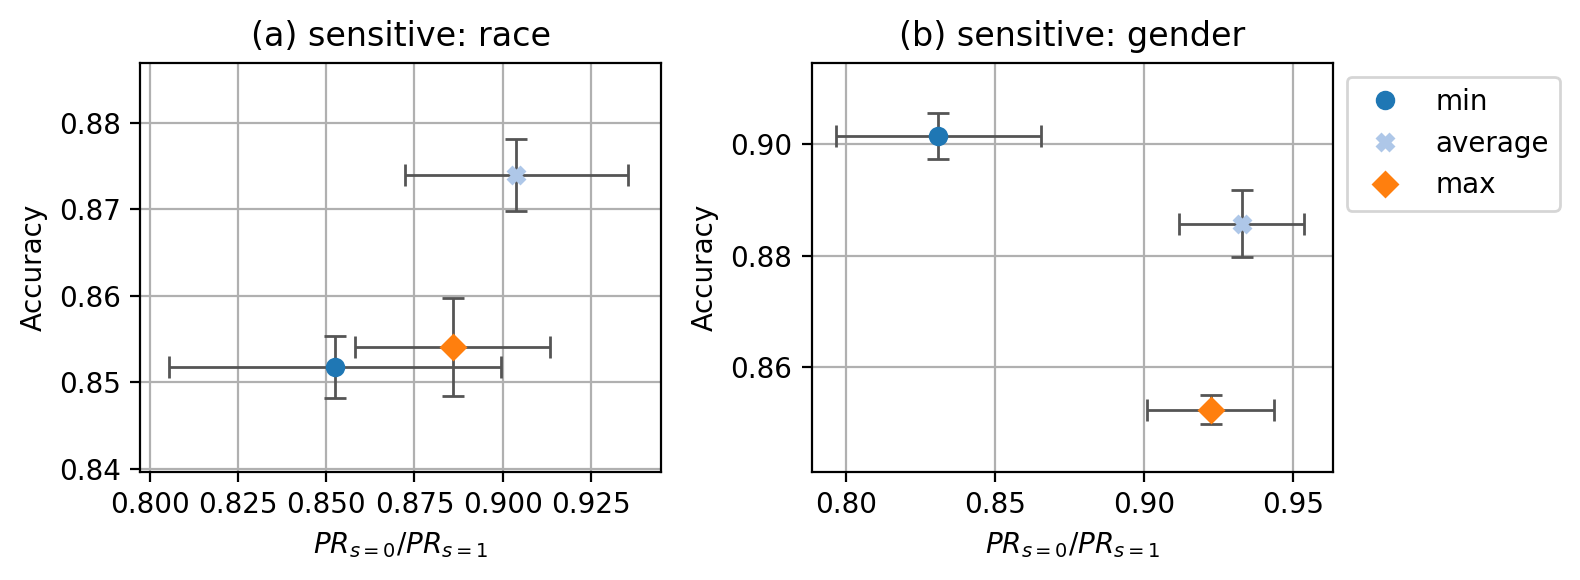

In [11]:
fig, (plot_race, plot_sex) = plt.subplots(ncols=2, figsize=(8, 3), dpi=200)

models = [
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_y1_s0_race}",
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_avg_race}",
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_y1_s1_race}",
]
results_race = df_race.filter(models)
single_plot(
    plot_race,
    results_race,
    ("prob_pos_race_White_0/race_White_1", r"$\mathit{PR}_{s=0}/\mathit{PR}_{s=1}$"),
    ("Accuracy", "Accuracy"),
    "Adult Race-Binary",
    "no_transform",
    ptype="cross",
    legend_pos=None,
)
plot_race.set_title("(a) sensitive: race")

mapping = {
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_y1_s0_sex}": "min",
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_avg_sex}": "average",
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_y1_s1_sex}": "max",
}
results_sex = df_sex.filter_and_map(mapping)
single_plot(
    plot_sex,
    results_sex,
    ("prob_pos_sex_Male_0/sex_Male_1", r"$\mathit{PR}_{s=0}/\mathit{PR}_{s=1}$"),
    ("Accuracy", "Accuracy"),
    "Adult Sex",
    "no_transform",
    ptype="cross",
    legend_pos="outside",
)
plot_sex.set_title("(b) sensitive: gender")
fig.tight_layout()
# fig.savefig("adult_tar_choice.eps")

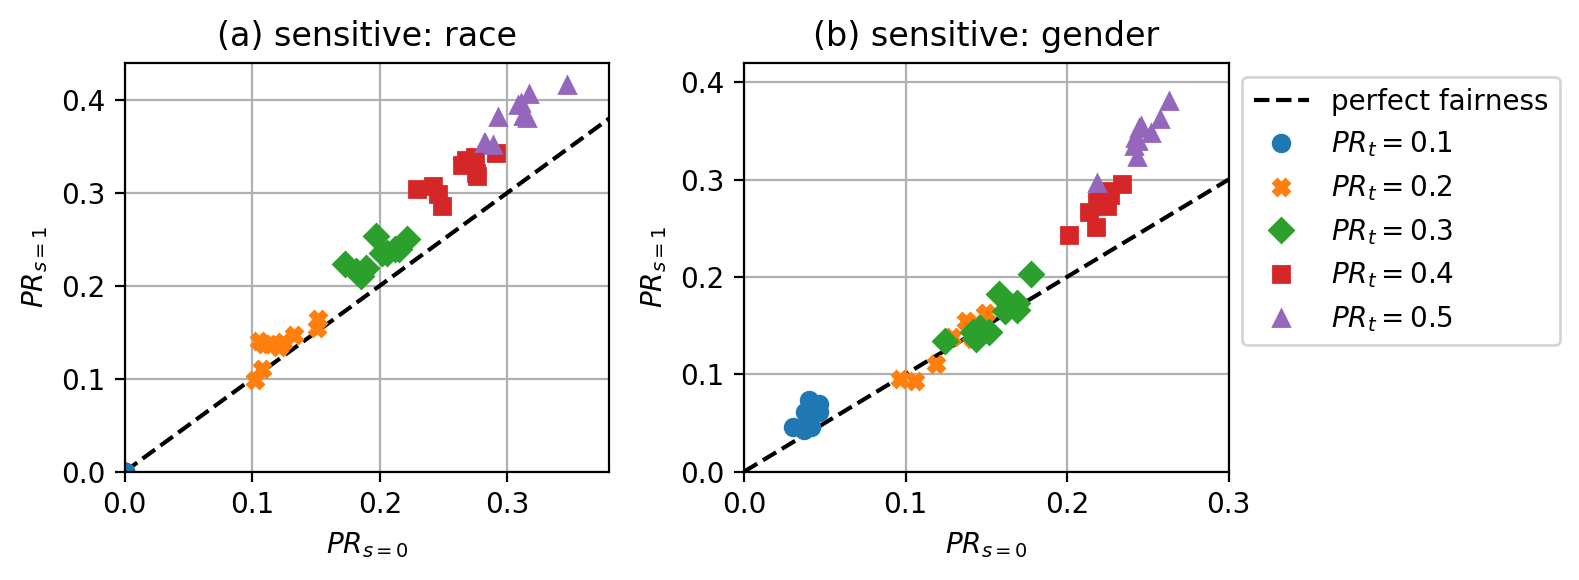

In [13]:
fig, (plot_race, plot_sex) = plt.subplots(ncols=2, figsize=(8, 3), dpi=200)

mapping = {
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.1": r"$\mathit{PR}_t=0.1$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.2": r"$\mathit{PR}_t=0.2$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.3": r"$\mathit{PR}_t=0.3$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.4": r"$\mathit{PR}_t=0.4$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.5": r"$\mathit{PR}_t=0.5$",
}
results_race = df_race.filter(mapping)
plot_race.plot([0., 1.], [0., 1.], color='k', linestyle='--', label="perfect fairness")
single_plot(
    plot_race,
    results_race,
    ("prob_pos_race_White_0", r"$\mathit{PR}_{s=0}$"),
    ("prob_pos_race_White_1", r"$\mathit{PR}_{s=1}$"),
    "Adult Race-Binary",
    "no_transform",
    ptype="scatter",
    legend_pos=None,
    alternating_style=False,
)
plot_race.set_xlim((0, 0.38))
plot_race.set_ylim((0, 0.44))
plot_race.set_title("(a) sensitive: race")

results_sex = df_sex.filter_and_map(mapping)
plot_sex.plot([0., 1.], [0., 1.], color='k', linestyle='--', label="perfect fairness")
single_plot(
    plot_sex,
    results_sex,
    ("prob_pos_sex_Male_0", r"$\mathit{PR}_{s=0}$"),
    ("prob_pos_sex_Male_1", r"$\mathit{PR}_{s=1}$"),
    "Adult Sex",
    "no_transform",
    ptype="scatter",
    legend_pos="outside",
    alternating_style=False,
)
plot_sex.set_xlim((0, 0.30))
plot_sex.set_ylim((0, 0.42))
plot_sex.set_title("(b) sensitive: gender")
fig.tight_layout()
# fig.savefig("adult_parity_scatter_pr_pr.eps")

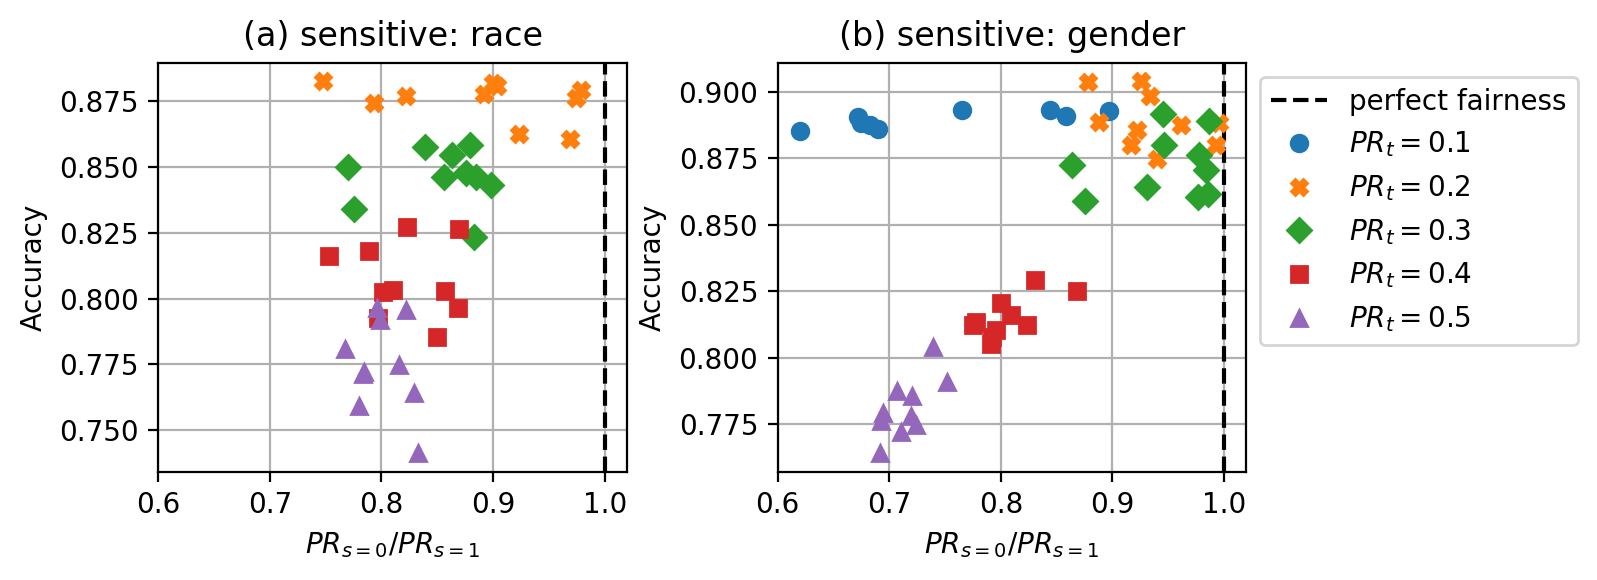

In [15]:
fig, (plot_race, plot_sex) = plt.subplots(ncols=2, figsize=(8, 3), dpi=200)

mapping = {
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.1": r"$\mathit{PR}_t=0.1$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.2": r"$\mathit{PR}_t=0.2$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.3": r"$\mathit{PR}_t=0.3$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.4": r"$\mathit{PR}_t=0.4$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.5": r"$\mathit{PR}_t=0.5$",
}
results_race = df_race.filter(mapping)
plot_race.axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
single_plot(
    plot_race,
    results_race,
    ("prob_pos_race_White_0/race_White_1", r"$\mathit{PR}_{s=0}/\mathit{PR}_{s=1}$"),
    ("Accuracy", "Accuracy"),
    "Adult Race-Binary",
    "no_transform",
    ptype="scatter",
    legend_pos=None,
    alternating_style=False,
    include_nan_entries=True,
)
plot_race.set_xlim((0.6, 1.02))
# plot_race.set_ylim((0, 0.44))
plot_race.set_title("(a) sensitive: race")

results_sex = df_sex.filter_and_map(mapping)
plot_sex.axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
single_plot(
    plot_sex,
    results_sex,
    ("prob_pos_sex_Male_0/sex_Male_1", r"$\mathit{PR}_{s=0}/\mathit{PR}_{s=1}$"),
    ("Accuracy", "Accuracy"),
    "Adult Sex",
    "no_transform",
    ptype="scatter",
    legend_pos="outside",
    alternating_style=False,
)
plot_sex.set_xlim((0.6, 1.02))
# plot_sex.set_ylim((0, 0.42))
plot_sex.set_title("(b) sensitive: gender")
fig.tight_layout()
# fig.savefig("adult_parity_scatter_acc.eps")

In [19]:
df_eq_race = Results.from_file(Path("results") / "eq_normal_test_10repeats_Compas Race_no_transform.csv")
df_eq_sex = Results.from_file(Path("results") / "eq_normal_test_10repeats_Compas Sex_no_transform.csv")
df_eq_race_baselines = Results.from_file(Path("..") / ".." / "EthicML" / "examples" / "results" / "kamiran_calders_variants_proportional_Compas Race_no_transform.csv")
df_eq_sex_baselines = Results.from_file(Path("..") / ".." / "EthicML" / "examples" / "results" / "kamiran_calders_variants_proportional_Compas Sex_no_transform.csv")

df_eq_race.append_df(df_eq_race_baselines.filter(["SVM"]).data)
df_eq_sex.append_df(df_eq_sex_baselines.filter(["SVM"]).data)

In [20]:
eq_mapping = {
    "Logistic Regression, C=1.0": "LR",
#     "TuningLR, wd: 0.1, RAdam, PR_t: 0.1": r"$\mathit{PR}_t=0.1$",
#     "TuningLR, wd: 0.1, RAdam, PR_t: 0.2": r"ours, $\mathit{PR}_t=0.2$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.3": r"ours, $\mathit{PR}_t=0.3$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.4": r"ours, $\mathit{PR}_t=0.4$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.5": r"ours, $\mathit{PR}_t=0.5$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.6": r"ours, $\mathit{PR}_t=0.6$",
    "TuningLR, wd: 0.1, RAdam, PR_t: 0.7": r"ours, $\mathit{PR}_t=0.7$",
#     "TuningLR, wd: 0.1, RAdam, PR_t: 0.8": r"ours, $\mathit{PR}_t=0.8$",
    "SVM": "SVM",
    "Agarwal, LR, EqOd": "Agarwal LR",
#     "Agarwal, LR, DP": "Agarwal 2",
    "ZafarEqOpp, τ=5.0, μ=1.2": "ZafarEqOpp, τ=5.0, μ=1.2",
    "Kamiran & Calders LR": "Kamiran & Calders LR",
}

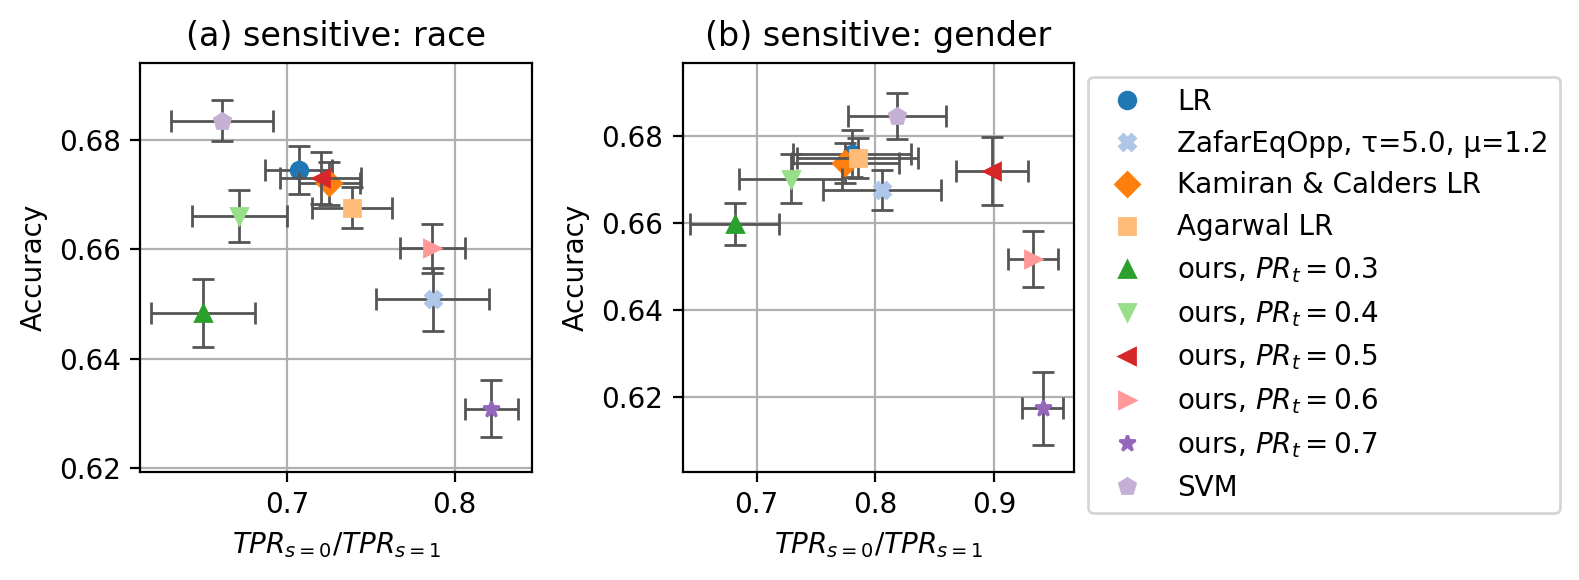

In [21]:
fig, (plot_race, plot_sex) = plt.subplots(ncols=2, figsize=(8, 3), dpi=200)

results_race = df_eq_race.filter(eq_mapping)
# plot_race.axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
single_plot(
    plot_race,
    results_race,
    ("TPR_race_0/race_1", r"$\mathit{TPR}_{s=0}/\mathit{TPR}_{s=1}$"),
    ("Accuracy", "Accuracy"),
    "Compas Race",
    "no_transform",
    ptype="cross",
    legend_pos=None,
)
# plot_race.set_xlim((0.6, 1.02))
# plot_race.set_ylim((0, 0.44))
plot_race.set_title("(a) sensitive: race")

results_sex = df_eq_sex.filter_and_map(eq_mapping)
# plot_sex.axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
single_plot(
    plot_sex,
    results_sex,
    ("TPR_sex_0/sex_1", r"$\mathit{TPR}_{s=0}/\mathit{TPR}_{s=1}$"),
    ("Accuracy", "Accuracy"),
    "Compas Sex",
    "no_transform",
    ptype="cross",
    legend_pos="outside",
)
# plot_sex.set_xlim((0.6, 1.02))
# plot_sex.set_ylim((0, 0.42))
plot_sex.set_title("(b) sensitive: gender")
fig.tight_layout()
# fig.savefig("propublica_opp_box_with_agarwal.eps")

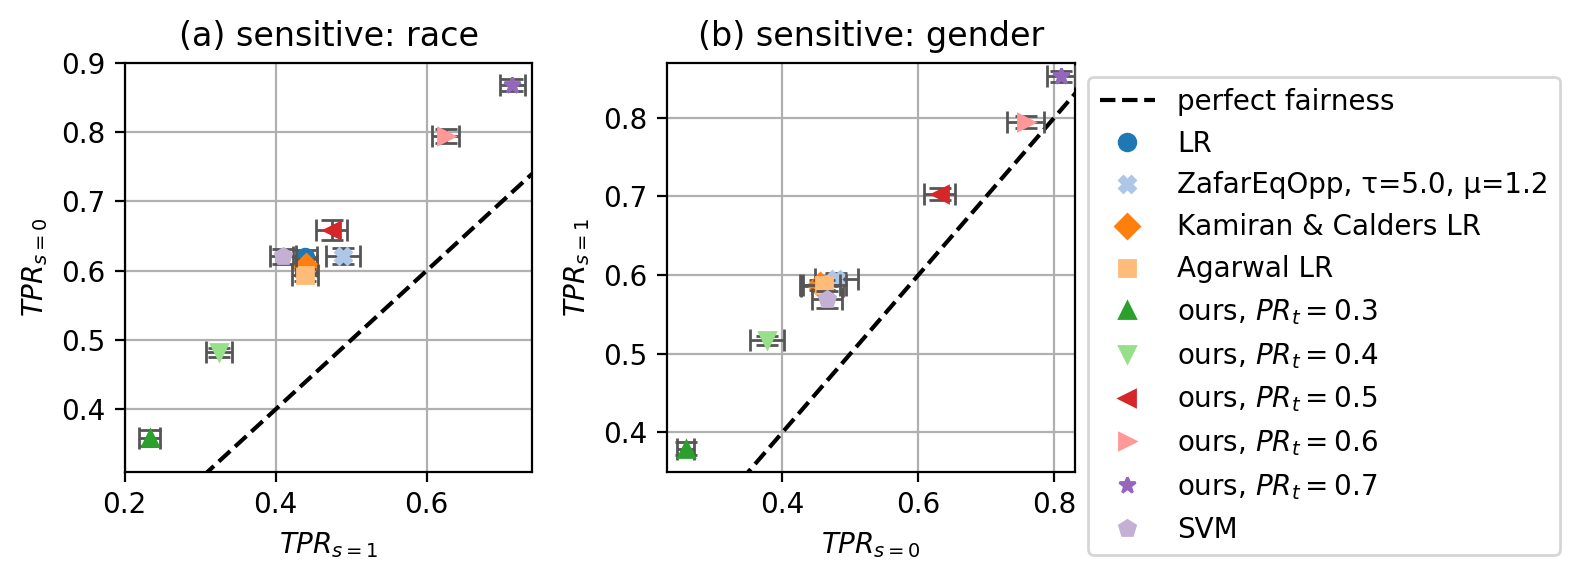

In [22]:
fig, (plot_race, plot_sex) = plt.subplots(ncols=2, figsize=(8, 3), dpi=200)

results_race = df_eq_race.filter(eq_mapping)
plot_race.plot([0., 1.], [0., 1.], color='k', linestyle='--', label="perfect fairness")
single_plot(
    plot_race,
    results_race,
    ("TPR_race_1", r"$\mathit{TPR}_{s=1}$"),
    ("TPR_race_0", r"$\mathit{TPR}_{s=0}$"),
    "Compas Race",
    "no_transform",
    ptype="cross",
    legend_pos=None,
)
plot_race.set_xlim((0.2, 0.74))
plot_race.set_ylim((0.31, 0.90))
plot_race.set_title("(a) sensitive: race")

results_sex = df_eq_sex.filter_and_map(eq_mapping)
plot_sex.plot([0., 1.], [0., 1.], color='k', linestyle='--', label="perfect fairness")
single_plot(
    plot_sex,
    results_sex,
    ("TPR_sex_0", r"$\mathit{TPR}_{s=0}$"),
    ("TPR_sex_1", r"$\mathit{TPR}_{s=1}$"),
    "Compas Sex",
    "no_transform",
    ptype="cross",
    legend_pos="outside",
)
plot_sex.set_ylim((0.35, 0.87))
plot_sex.set_xlim((0.23, 0.83))
plot_sex.set_title("(b) sensitive: gender")
fig.tight_layout()
# fig.savefig("propublica_opp_scatter_tpr.eps")

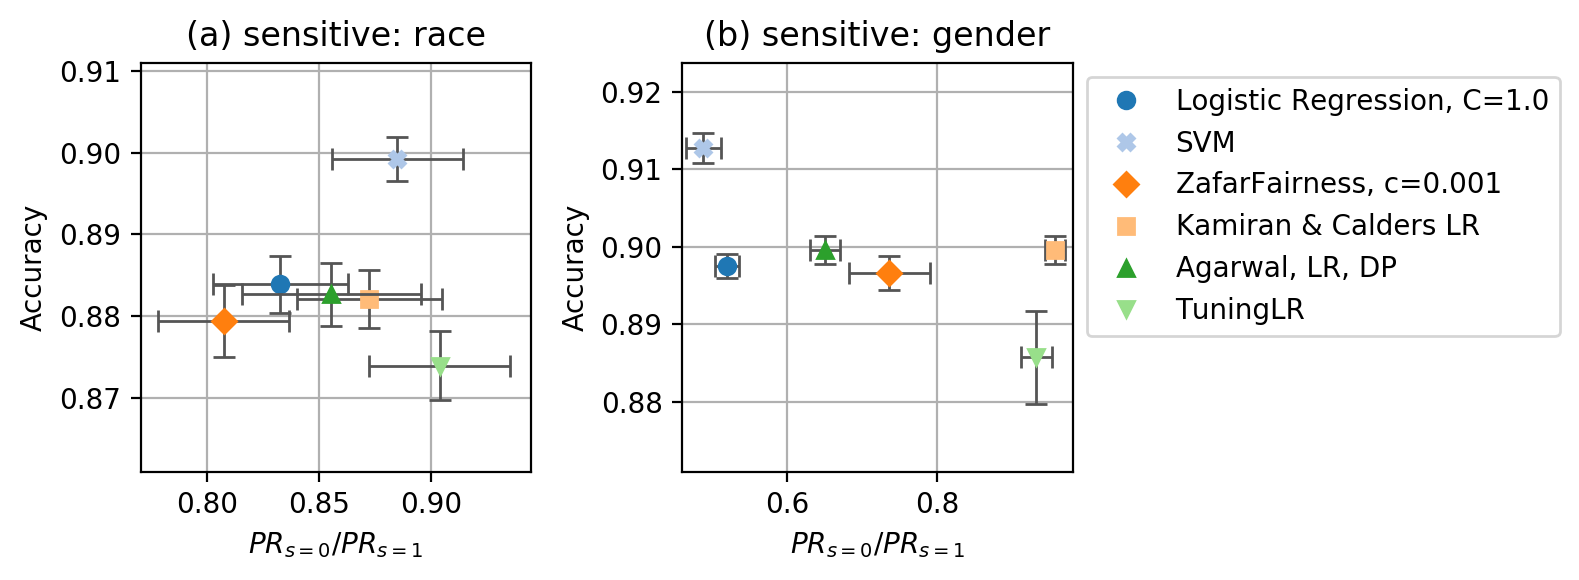

In [24]:
dp_models = {
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_avg_race}": f"TuningLR",
    f"TuningLR, wd: 0.1, RAdam, PR_t: {rate_avg_sex}": f"TuningLR",
    "Kamiran & Calders LR": "Kamiran & Calders LR",
#     "ZafarAccuracy, γ=0.5": "ZafarAccuracy, γ=0.5",
    "ZafarFairness, c=0.001": "ZafarFairness, c=0.001",
    "Agarwal, LR, DP": "Agarwal, LR, DP",
    "SVM": "SVM",
    "Logistic Regression, C=1.0": "Logistic Regression, C=1.0",
}

fig, (plot_race, plot_sex) = plt.subplots(ncols=2, figsize=(8, 3), dpi=200)

results_race = df_race.filter(dp_models)
# plot_race.axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
single_plot(
    plot_race,
    results_race,
    ("prob_pos_race_White_0/race_White_1", r"$\mathit{PR}_{s=0}/\mathit{PR}_{s=1}$"),
    ("Accuracy", "Accuracy"),
    "Adult Race-Binary",
    "no_transform",
    ptype="cross",
    legend_pos=None,
)
# plot_race.set_xlim((0.6, 1.02))
# plot_race.set_ylim((0, 0.44))
plot_race.set_title("(a) sensitive: race")

results_sex = df_sex.filter_and_map(dp_models)
# plot_sex.axvline(x=1.0, linestyle='--', color='k', label="perfect fairness")
single_plot(
    plot_sex,
    results_sex,
    ("prob_pos_sex_Male_0/sex_Male_1", r"$\mathit{PR}_{s=0}/\mathit{PR}_{s=1}$"),
    ("Accuracy", "Accuracy"),
    "Adult Sex",
    "no_transform",
    ptype="cross",
    legend_pos="outside",
)
# plot_sex.set_xlim((0.6, 1.02))
# plot_sex.set_ylim((0, 0.42))
plot_sex.set_title("(b) sensitive: gender")
fig.tight_layout()
# fig.savefig("propublica_opp_box_with_agarwal.eps")

In [25]:
pr0_2 = df_sex.query("model == 'TuningLR, wd: 0.1, RAdam, PR_t: 0.2'")
# pr0_2["prob_pos_sex_Male_0"], pr0_2["prob_pos_sex_Male_1"], pr0_2["prob_pos"]

In [26]:
fpr = 1-pr0_2["TNR"]
(pr0_2["prob_pos"] - fpr) / (pr0_2["TPR"] - fpr) 

10     0.113644
24     0.113644
38     0.113644
52     0.113644
66     0.113644
80     0.113644
94     0.113644
108    0.113644
122    0.113644
136    0.113644
dtype: float64

In [27]:
0.113644 * (pr0_2["TPR"] - fpr) + fpr

10     0.156516
24     0.146138
38     0.095951
52     0.155665
66     0.148180
80     0.133209
94     0.140184
108    0.099353
122    0.114665
136    0.138823
dtype: float64

In [28]:
fpr = 1-pr0_2["TNR_sex_Male_0"]
(pr0_2["prob_pos_sex_Male_0"] - fpr) / (pr0_2["TPR_sex_Male_0"] - fpr) 

10     0.113644
24     0.113644
38     0.113644
52     0.113644
66     0.113644
80     0.113644
94     0.113644
108    0.113644
122    0.113644
136    0.113644
dtype: float64

In [34]:
df_traintrain_race = pd.read_csv("results/dp_traintrain_10repeats_Adult Race-Binary_no_transform.csv")
df_traintrain_sex = pd.read_csv("results/dp_traintrain_10repeats_Adult Sex_no_transform.csv")

In [38]:
means = df_traintrain_race.groupby("model").agg("mean")
prts = [0.1, 0.2, 0.3, 0.4, 0.5]
expected_pr = []
for prt in prts:
    model_name = f"TuningLR, wd: 0.1, RAdam, PR_t: {prt}"
    tpr = means["TPR"].loc[model_name]
    fpr = 1 - means["TNR"].loc[model_name]
    expected_pr.append(prt * (tpr - fpr) + fpr)
expected_pr

[0.0,
 0.1536776258045166,
 0.3102702987282795,
 0.45675748861673904,
 0.5812029815266728]

In [29]:
pr0_2_traintrain = df_traintrain_sex.query("model == 'TuningLR, wd: 0.1, RAdam, PR_t: 0.2'")

In [32]:
fpr = 1-pr0_2_traintrain["TNR"]
0.2 * (pr0_2_traintrain["TPR"] - fpr) + fpr

9     0.185719
22    0.181946
35    0.126193
48    0.170660
61    0.190781
dtype: float64

In [33]:
pr0_2["prob_pos"]

10     0.156516
24     0.146138
38     0.095951
52     0.155665
66     0.148180
80     0.133209
94     0.140184
108    0.099354
122    0.114665
136    0.138823
Name: prob_pos, dtype: float64

In [59]:
df = results_race.data